# Online Conference Data Usage

In this project, we sort to predict data usage of several online conference tools including Zoom, Google Meet, Hangouts, Mixlr and Free Conference Calls.

In [157]:
import pandas as pd
import numpy as np

df = pd.read_csv('online_meetings.csv')
df

,Platform,Start Time,End Time,Duration,Participant Video on,Participant Mic On,Participant Screen Share,Others Video on,Others Screen Share,Window Minimized,Group,Download,Upload,Total
0,Zoom,7/8/2020 9:00:00,7/8/2020 10:00:00,1:00:00,0,0,0,0,1,0,1,41.1,9.300,50.500
1,Zoom,7/8/2020 10:00:00,7/8/2020 11:50:00,1:50:00,0,0,0,1,1,0,1,283.6,19.400,303.100
2,Google Meet,7/8/2020 12:00:00,7/8/2020 13:10:00,1:10:00,1,0,0,1,1,0,1,145.7,8.800,154.500
3,Zoom,7/10/2020 10:00:00,7/10/2020 10:30:00,0:30:00,0,0,0,1,1,0,1,99.1,3.100,102.300
4,Zoom,7/10/2020 17:00:00,7/10/2020 17:33:00,0:33:00,0,1,0,0,0,0,1,20.4,16.100,36.500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,Mixlr (audio),8/16/2020 10:14:00,8/16/2020 11:36:00,1:22:00,0,0,0,0,0,0,0,18.0,0.011,18.011
61,Google Meet,8/16/2020 12:15:00,8/16/2020 12:26:00,0:11:00,0,1,0,0,0,0,1,4.7,1.200,5.900
62,Google Meet,8/16/2020 12:51:00,8/16/2020 15:50:00,2:59:00,0,1,1,0,0,0,0,32.6,272.500,305.000
63,Zoom,8/16/2020 17:07:00,8/16/2020 18:06:00,0:59:00,0,1,1,0,0,0,1,42.4,60.800,103.200


## Data Cleaning

Checking for null data

In [158]:
df.isnull().sum()

Platform                    0
Start Time                  0
End Time                    0
Duration                    0
Participant Video on        0
Participant Mic On          0
Participant Screen Share    0
Others Video on             0
Others Screen Share         0
Window Minimized            0
Group                       0
Download                    0
Upload                      0
Total                       0
dtype: int64

In [159]:
df.dtypes

Platform                     object
Start Time                   object
End Time                     object
Duration                     object
Participant Video on          int64
Participant Mic On            int64
Participant Screen Share      int64
Others Video on               int64
Others Screen Share           int64
Window Minimized              int64
Group                         int64
Download                    float64
Upload                      float64
Total                       float64
dtype: object

In [160]:
df.Platform.value_counts()

Zoom                    44
Google Meet             10
Mixlr (audio)            7
Hangouts                 2
Zoom                     1
Free Conference Call     1
Name: Platform, dtype: int64

Renaming the columns

In [161]:
df.replace({'Zoom ':'zoom', 'Zoom':'zoom', 
            'Free Conference Call':'free_conference_call', 
            'Google Meet':'google_meet', 'Mixlr (audio)':'mixlr', 
            'Hangouts':'hangouts'}, inplace=True)

Converting time into date object

In [162]:
start_day = pd.DataFrame({'start_day': [pd.Timestamp(i).day for i in df['Start Time']]})
start_hr = pd.DataFrame({'start_hr':[pd.Timestamp(i).hour for i in df['Start Time']]})
start_min = pd.DataFrame({'start_min':[pd.Timestamp(i).minute for i in df['Start Time']]})

In [163]:
end_day = pd.DataFrame({'end_day':[pd.Timestamp(i).day for i in df['End Time']]})
end_hr = pd.DataFrame({'end_hr':[pd.Timestamp(i).hour for i in df['End Time']]})
end_min = pd.DataFrame({'end_min':[pd.Timestamp(i).minute for i in df['End Time']]})

In [164]:
duration_sec = pd.DataFrame({'duration_sec':[pd.Timedelta(i).seconds for i in df['Duration']]})

Adding Upload and Download Speeds

In [165]:
df_dummy = df

In [166]:
upload_speed = pd.DataFrame({'avg_upload_speed': [(b/s)*8 for b, s in zip(df.Upload, duration_sec.duration_sec)]})
download_speed = pd.DataFrame({'avg_download_speed': [(b/s)*8 for b, s in zip(df.Download, duration_sec.duration_sec)]})

Concatenating with the dataset

In [167]:
df_dummy = pd.concat([df, start_day, start_hr, start_min, end_day, end_hr, end_min, duration_sec, download_speed, upload_speed], axis=1)
df_dummy.head()

,Platform,Start Time,End Time,Duration,Participant Video on,Participant Mic On,Participant Screen Share,Others Video on,Others Screen Share,Window Minimized,...,Total,start_day,start_hr,start_min,end_day,end_hr,end_min,duration_sec,avg_download_speed,avg_upload_speed
0,zoom,7/8/2020 9:00:00,7/8/2020 10:00:00,1:00:00,0,0,0,0,1,0,...,50.5,8,9,0,8,10,0,3600,0.091333,0.020667
1,zoom,7/8/2020 10:00:00,7/8/2020 11:50:00,1:50:00,0,0,0,1,1,0,...,303.1,8,10,0,8,11,50,6600,0.343758,0.023515
2,google_meet,7/8/2020 12:00:00,7/8/2020 13:10:00,1:10:00,1,0,0,1,1,0,...,154.5,8,12,0,8,13,10,4200,0.277524,0.016762
3,zoom,7/10/2020 10:00:00,7/10/2020 10:30:00,0:30:00,0,0,0,1,1,0,...,102.3,10,10,0,10,10,30,1800,0.440444,0.013778
4,zoom,7/10/2020 17:00:00,7/10/2020 17:33:00,0:33:00,0,1,0,0,0,0,...,36.5,10,17,0,10,17,33,1980,0.082424,0.065051


## Data Visualization

Total Usage against time

In [168]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style="whitegrid")

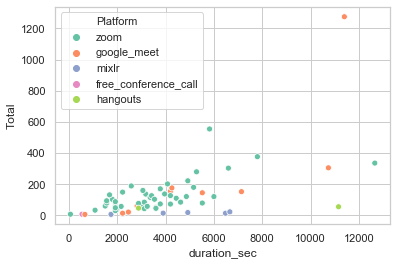

In [169]:
_ = sns.scatterplot(df_dummy.duration_sec, df_dummy.Total,hue=df_dummy.Platform, palette='Set2')

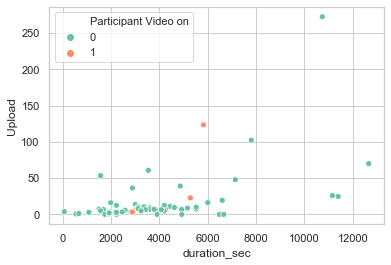

In [170]:
_ = sns.scatterplot(df_dummy.duration_sec, df_dummy.Upload,hue=df_dummy['Participant Video on'], palette='Set2')

### Upload

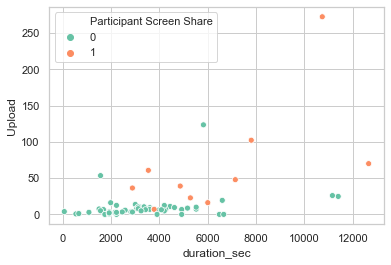

In [171]:
_ = sns.scatterplot(df_dummy.duration_sec, df_dummy.Upload,hue=df_dummy['Participant Screen Share'], palette='Set2')

### Download

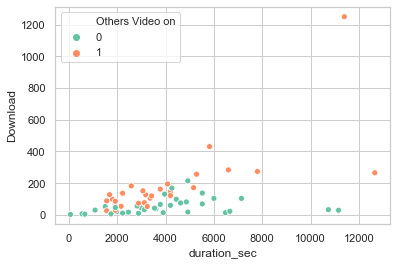

In [172]:
_ = sns.scatterplot(df_dummy.duration_sec, df_dummy.Download,hue=df_dummy['Others Video on'], palette='Set2')

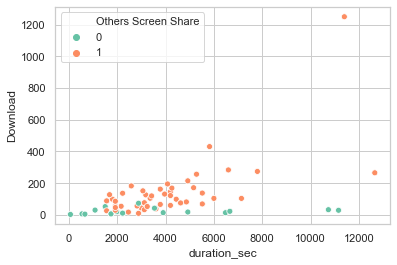

In [173]:
_ = sns.scatterplot(df_dummy.duration_sec, df_dummy.Download,hue=df_dummy['Others Screen Share'], palette='Set2')

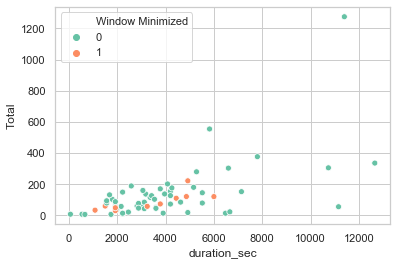

In [174]:
_ = sns.scatterplot(df_dummy.duration_sec, df_dummy.Total,hue=df_dummy['Window Minimized'], palette='Set2')

Considering individual platforms.

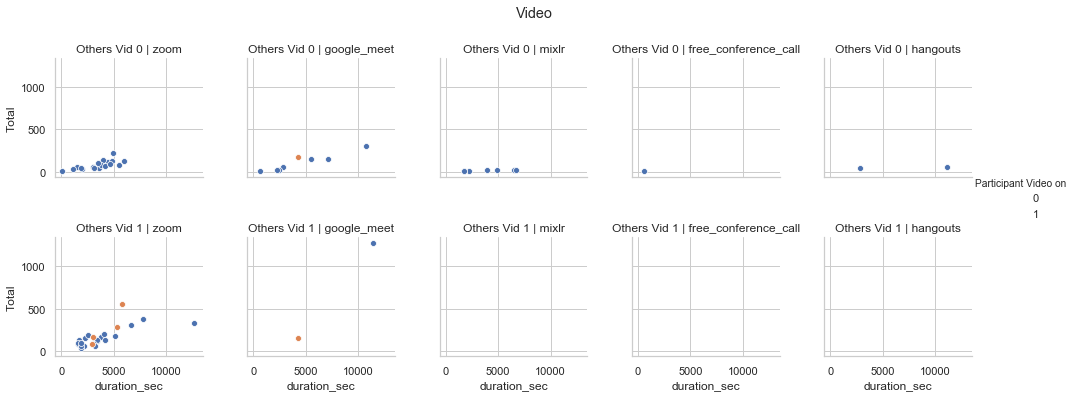

In [175]:
def scatter(x,y, **kwargs):
    sns.scatterplot(x, y, palette='Set2')

g = sns.FacetGrid(df_dummy, col='Platform', row='Others Video on', hue='Participant Video on', aspect=1, palette='Set2')
_ = g.map(scatter, "duration_sec", "Total")
plt.subplots_adjust(hspace=0.5, wspace=0.3)
_ = g.add_legend()
_ = g.fig.set_size_inches(15,5)
_ = g.fig.suptitle("Video", y=1.08)
_ = g.set_titles(row_template = 'Others Vid {row_name}', col_template = '{col_name}')

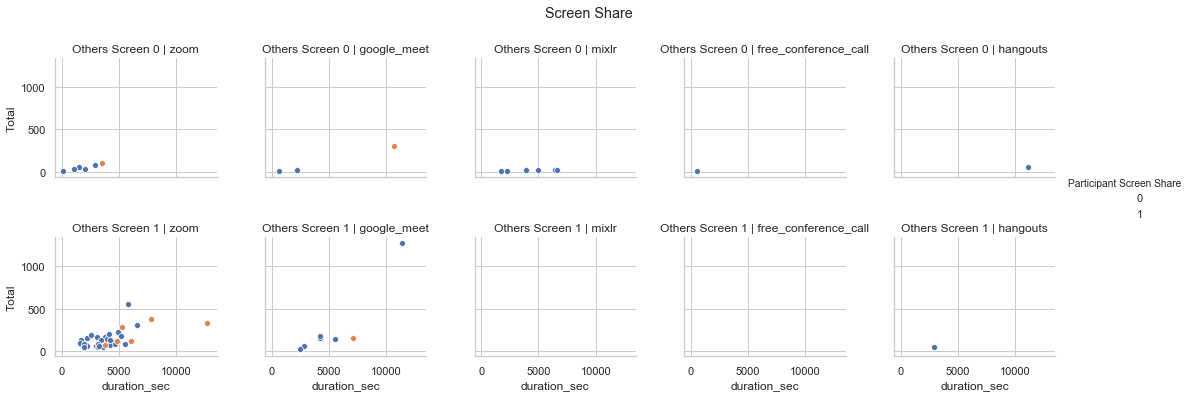

In [176]:
def scatter(x,y, **kwargs):
    sns.scatterplot(x, y, palette='Set2')

g = sns.FacetGrid(df_dummy, col='Platform', row='Others Screen Share', hue='Participant Screen Share', aspect=1, palette='Set2')
_ = g.map(scatter, "duration_sec", "Total")
plt.subplots_adjust(hspace=0.5, wspace=0.3)
_ = g.fig.set_size_inches(15,5)
_ = g.add_legend()
_ = g.fig.suptitle("Screen Share", y=1.08)
_ = g.set_titles(row_template = 'Others Screen {row_name}', col_template = '{col_name}')

Everything checks out. Viewing the correlations

In [177]:
df_dummy.corr()

,Participant Video on,Participant Mic On,Participant Screen Share,Others Video on,Others Screen Share,Window Minimized,Group,Download,Upload,Total,start_day,start_hr,start_min,end_day,end_hr,end_min,duration_sec,avg_download_speed,avg_upload_speed
Participant Video on,1.000000,0.248385,0.011331,0.259250,0.078575,-0.135978,0.135978,0.185243,0.084599,0.193554,0.217344,0.001147,0.006236,0.216532,0.080363,-0.091667,0.038327,0.273620,0.018165
Participant Mic On,0.248385,1.000000,0.475085,-0.093270,-0.067036,0.046189,0.125370,0.213384,0.373309,0.284071,0.342520,0.126187,0.168163,0.347018,-0.038440,0.063937,0.265699,0.091326,0.176205
Participant Screen Share,0.011331,0.475085,1.000000,-0.112605,0.073300,0.172727,-0.054545,0.038738,0.534375,0.155753,-0.095096,-0.018397,0.050032,-0.096763,0.161183,-0.096747,0.421961,-0.159797,0.211890
Others Video on,0.259250,-0.093270,-0.112605,1.000000,0.468921,-0.198715,0.370934,0.395972,0.020788,0.377477,-0.095286,-0.028820,-0.113850,-0.094930,-0.077176,0.180470,0.026125,0.632149,-0.031311
Others Screen Share,0.078575,-0.067036,0.073300,0.468921,1.000000,0.073300,0.593729,0.325199,-0.056282,0.293713,-0.015090,-0.252913,-0.114506,-0.016894,-0.146671,0.108080,0.093808,0.437310,-0.149888
Window Minimized,-0.135978,0.046189,0.172727,-0.198715,0.073300,1.000000,0.181818,-0.080246,-0.095599,-0.096895,0.117539,-0.269518,0.186658,0.116192,-0.184209,0.117429,-0.096503,-0.066739,-0.100251
Group,0.135978,0.125370,-0.054545,0.370934,0.593729,0.181818,1.000000,0.239081,-0.163314,0.188795,0.055536,-0.352306,-0.142399,0.052191,-0.207235,0.042064,-0.217383,0.470333,0.040819
Download,0.185243,0.213384,0.038738,0.395972,0.325199,-0.080246,0.239081,1.000000,0.148130,0.975365,-0.063240,0.303461,0.110901,-0.051837,-0.257520,0.189671,0.505653,0.722039,-0.032108
Upload,0.084599,0.373309,0.534375,0.020788,-0.056282,-0.095599,-0.163314,0.148130,1.000000,0.362634,0.039570,0.195063,0.103013,0.040256,0.252748,0.127248,0.524354,-0.014070,0.435526
Total,0.193554,0.284071,0.155753,0.377477,0.293713,-0.096895,0.188795,0.975365,0.362634,1.000000,-0.050985,0.329597,0.127631,-0.040086,-0.186183,0.207073,0.593583,0.676836,0.067140


Dummy Coding Platforms

In [178]:
platform_dummy = pd.get_dummies(df_dummy.Platform, drop_first=True)
platform_dummy.head()

,google_meet,hangouts,mixlr,zoom
0,0,0,0,1
1,0,0,0,1
2,1,0,0,0
3,0,0,0,1
4,0,0,0,1


In [179]:
df_dummy = pd.concat([df_dummy, platform_dummy], axis=1)

Confirming datatypes

In [180]:
df_dummy.dtypes

Platform                     object
Start Time                   object
End Time                     object
Duration                     object
Participant Video on          int64
Participant Mic On            int64
Participant Screen Share      int64
Others Video on               int64
Others Screen Share           int64
Window Minimized              int64
Group                         int64
Download                    float64
Upload                      float64
Total                       float64
start_day                     int64
start_hr                      int64
start_min                     int64
end_day                       int64
end_hr                        int64
end_min                       int64
duration_sec                  int64
avg_download_speed          float64
avg_upload_speed            float64
google_meet                   uint8
hangouts                      uint8
mixlr                         uint8
zoom                          uint8
dtype: object

Dropping original time columns

In [181]:
df_dummy.drop(['Start Time', 'End Time', 'Duration', 'Platform'], axis=1, inplace=True)
df_dummy.head()

,Participant Video on,Participant Mic On,Participant Screen Share,Others Video on,Others Screen Share,Window Minimized,Group,Download,Upload,Total,...,end_day,end_hr,end_min,duration_sec,avg_download_speed,avg_upload_speed,google_meet,hangouts,mixlr,zoom
0,0,0,0,0,1,0,1,41.1,9.3,50.5,...,8,10,0,3600,0.091333,0.020667,0,0,0,1
1,0,0,0,1,1,0,1,283.6,19.4,303.1,...,8,11,50,6600,0.343758,0.023515,0,0,0,1
2,1,0,0,1,1,0,1,145.7,8.8,154.5,...,8,13,10,4200,0.277524,0.016762,1,0,0,0
3,0,0,0,1,1,0,1,99.1,3.1,102.3,...,10,10,30,1800,0.440444,0.013778,0,0,0,1
4,0,1,0,0,0,0,1,20.4,16.1,36.5,...,10,17,33,1980,0.082424,0.065051,0,0,0,1


## Predictive Modelling for Zoom Bandwidth Consumption

Creating X and y variables

In [184]:
X = df_dummy[df_dummy.zoom == 1].drop(['Download', 'Upload', 'Total', 'google_meet', 'mixlr', 'zoom', 'hangouts', 'Window Minimized'], axis=1)
X.head()

,Participant Video on,Participant Mic On,Participant Screen Share,Others Video on,Others Screen Share,Group,start_day,start_hr,start_min,end_day,end_hr,end_min,duration_sec,avg_download_speed,avg_upload_speed
0,0,0,0,0,1,1,8,9,0,8,10,0,3600,0.091333,0.020667
1,0,0,0,1,1,1,8,10,0,8,11,50,6600,0.343758,0.023515
3,0,0,0,1,1,1,10,10,0,10,10,30,1800,0.440444,0.013778
4,0,1,0,0,0,1,10,17,0,10,17,33,1980,0.082424,0.065051
5,0,0,0,0,1,1,15,9,0,15,10,0,3600,0.084444,0.015556


In [185]:
y = df_dummy.Total[df_dummy.zoom == 1]
y.shape

(45,)

Splitting the dataset

In [186]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=92)

Preparing the model

In [187]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
_ = regressor.fit(X_train, y_train)

In [188]:
regressor.score(X,y)

0.8839116676765345

In [189]:
y_pred = regressor.predict(X_test)
y_pred = [5 if i < 0 else i for i in y_pred]

In [190]:
df_result = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_result.head()

,Actual,Predicted
36,72.4,81.905650
47,57.7,44.311619
6,170.0,149.130119
63,103.2,104.102141
20,221.7,193.571247


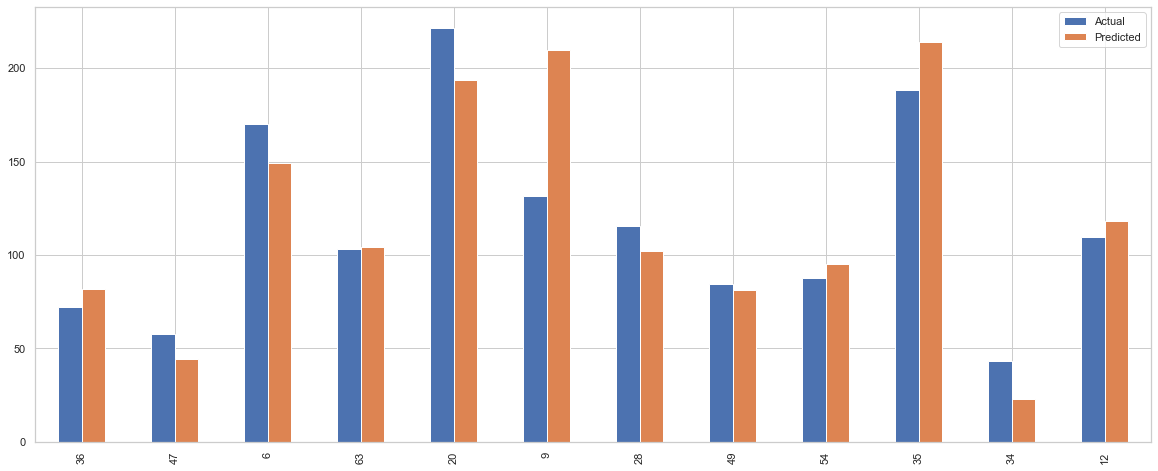

In [191]:
df_result.head(30).plot(kind='bar', figsize=(20,8))

In [192]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 19.098643854279164
Mean Squared Error: 749.0037891395544
Root Mean Squared Error: 27.36793359279349


### Predicting Bandwidth consumption of this Zoom  Lecture

In [193]:
X.avg_upload_speed.mean()

0.04644537882906088

In [268]:
is_group = 1
participant_video = 0
participant_mic = 0
participant_screen = 0
others_video = 1
others_screen = 1
start_hr = 12
start_min = 47
end_hr = 13
end_min = 28
avg_download_speed = 0.27
avg_upload_speed = 0.36

eie_523_class = pd.DataFrame({'Participant Video on':participant_video, 'Participant Mic On':participant_mic, 'Participant Screen Share':participant_screen, 'Others Video on':others_video, 'Others Screen Share':others_screen, 'Group':is_group, 'start_day':21, 'start_hr':start_hr, 'start_min':start_min, 'end_day':21, 'end_hr':end_hr, 'end_min':end_min, 'duration_sec':(end_min - start_min + (end_hr - start_hr)*60)*60 , 'avg_download_speed':avg_download_speed, 'avg_upload_speed':avg_upload_speed}, index=[0])
eie_523_class.head()

,Participant Video on,Participant Mic On,Participant Screen Share,Others Video on,Others Screen Share,Group,start_day,start_hr,start_min,end_day,end_hr,end_min,duration_sec,avg_download_speed,avg_upload_speed
0,0,0,0,1,1,1,21,12,47,21,13,28,2460,0.27,0.36


In [269]:
prediction = regressor.predict(eie_523_class)
prediction = [3 if i < 3 else i for i in prediction]
print('Total bandwidth to be consumed is: ' + str(prediction))

Total bandwidth to be consumed is: [104.71384279616308]
